In [1]:
import os
from tramdag import TramDagModel, TramDagConfig

In [2]:
cfg=TramDagConfig()
cfg.setup_configuration(EXPERIMENT_DIR='dev_ls_init2') # works also without arguments, then default paths are used

Configuration already exists: dev_ls_init2\configuration.json


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

n = 1000

x1 = np.random.normal(loc=0, scale=1, size=n)
x2 = np.random.normal(loc=0, scale=1, size=n)
x3 = np.random.normal(loc=0, scale=1, size=n)
b = np.random.binomial(n=1, p=0.4, size=n)
o4 = np.random.choice([0, 1, 2, 3], size=n, p=[0.25, 0.25, 0.25, 0.25])


df = pd.DataFrame({
"x1": x1,
"x2": x2,
"x3": x3,
"x4": b,
"x5": o4,})

print(df.head())


# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

         x1        x2        x3  x4  x5
0 -0.447382 -1.044172 -0.752544   1   3
1  0.243927 -0.784616  0.516803   0   2
2  0.483478  1.141327  0.593819   1   2
3 -0.006201 -0.829785  0.793990   0   2
4  0.253560  2.423582 -0.651968   1   1


In [4]:
# here you need to specify which varibles are in the graph and what type they are (continous or ordinal) for the model builder 
data_type= {'x1':'continous',
            'x4':'ordinal_Xn_Yo', 
            'x5':'ordinal_Xn_Yo'} 

cfg.set_data_type(data_type)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
x1                   | continous       | continuous [c]                 | continuous [c]                
x4                   | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
x5                   | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
---------------------------------------------------------------------------------------------------------
Configuration updated successfully at dev_ls_init2\configuration.json.


c:\Users\donald_duck\TramDag\tramdag\utils\configuration.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


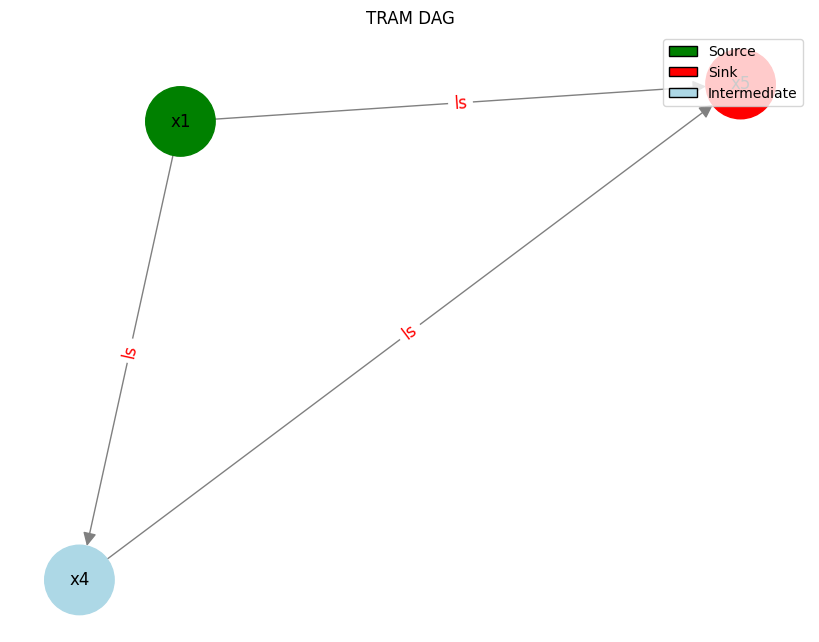

In [5]:
cfg.set_meta_adj_matrix(seed=126) #Create the (Meta) Adjacency Matrix

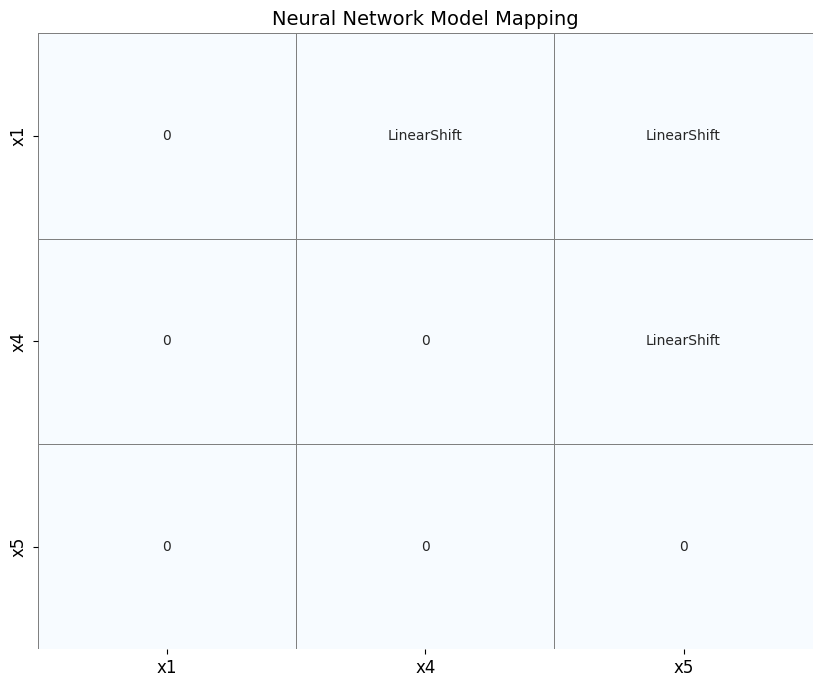

In [6]:
cfg.set_tramdag_nn_models() 


In [7]:
cfg.compute_levels(train_df)

### dev inint for ls coefficients 


In [8]:
from tramdag import TramDagModel
device='cpu'
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data =train_df )

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'x1' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':            x1        x2        x3  x4  x5
29  -0.508471  0.328861  0.347119   0   0
535  0.068397 -0.256335  0.114500   0   1
695  0.450197  0.651124  0.297106   0   1
557 -0.118341 -0.653743 -0.399499   1   2
836 -0.481898  1.278029 -0.214078   0   1
..        ...       ...       ...  ..  ..
106 -0.390323  1.031066 -0.818042   0   1
270 -0.988751 -1.071370 -1.286314   1   0
860 -1.035213 -1.003737  0.244299   0   3
435 -0.915376  0.311929  0.599492   0   0
102  1.212684  0.537668  0.223413   1   0

[800 rows x 5 columns], 'overwrite_initial_weights': True}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Wrote DataFrame to temporary CSV: temp\initial_data_1765015211.csv
[DEBUG] R script written to: C:\Users\DONALD~1\AppData\Local\Te

In [9]:
td_model.load_or_compute_minmax(td_train_data=train_df)

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to dev_ls_init2\min_max_scaling.json


In [10]:
sub = test_df.sample(n=3, random_state=42)
sub

,x1,x2,x3,x4,x5,x6,x7
365,0.014906,0,1,1.820109,0,0.736876,3
583,-2.011921,0,0,0.084042,0,0.350041,3
879,0.478357,0,0,3.012360,1,1.058472,3


In [11]:
u_df = td_model.get_latent(sub)

[Warning] best_model.pt not found, falling back to initial_model.pt


c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[Warning] best_model.pt not found, using initial_model.pt
[WARNING] Ordinal 'x3' has 2 unique values, expected 3. Skipping strict comparison.
[Warning] best_model.pt not found, using initial_model.pt
[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 2 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.int64(0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.int64(0), np.int64(1)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 2 unique values, expected 3. Skipping strict comparison.
[Warning] best_model.pt not found, falling back to initial_mode

In [12]:
u_df

,x1,x1_U,x2,x2_U_lower,x2_U_upper,x3,x3_U_lower,x3_U_upper,x4,x4_U,x5,x5_U_lower,x5_U_upper,x6,x6_U,x7,x7_U_lower,x7_U_upper
365,0.014906,-0.011945,0,-inf,0.92022,1,-0.605174,1.863768,1.820109,-0.394370,0,-inf,-0.335095,0.736876,-0.158830,3,2.607728,4.998375
583,-2.011921,-0.379891,0,-inf,0.92022,0,-inf,-0.605174,0.084042,0.216933,0,-inf,-0.344913,0.350041,-0.229819,3,4.560006,6.950653
879,0.478357,0.077348,0,-inf,0.92022,0,-inf,-0.605174,3.012360,-0.604055,1,-0.344913,0.091860,1.058472,-0.076215,3,1.929949,4.320597


In [13]:
# TODO FIX THE CONTINOUS SAMPLING

samples, latents = td_model.sample(predefined_latent_samples_df=u_df,number_of_counterfactual_samples=100)

[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Using predefined latents samples from dataframe -> therefore n_samples is set to the number of rows in the dataframe: 3
[INFO] Deleting all previously sampled data.
Deleted directory: counterf\x1\sampling
Deleted directory: counterf\x2\sampling
Deleted directory: counterf\x3\sampling
Deleted directory: counterf\x4\sampling
Directory does not exist: counterf\x5\sampling
Directory does not exist: counterf\x6\sampling
Directory does not exist: counterf\x7\sampling

----*----------*-------------*--------Sample Node: x1 ------------*-----------------*-------------------*--
[INFO] Using predefined latents samples for node x1 from dataframe column: x1_U


c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
[INFO] Chandrupatla root finding ->  iterations::  32%|███▏      | 32/100 [00:00<00:00, 863.84it/s]


[INFO] Completed sampling for node 'x1'

----*----------*-------------*--------Sample Node: x2 ------------*-----------------*-------------------*--
[INFO] Detected 'x2_U_lower' and 'x2_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x2: 100%|██████████| 3/3 [00:19<00:00,  6.36s/it]


[INFO] Completed sampling for node 'x2'

----*----------*-------------*--------Sample Node: x3 ------------*-----------------*-------------------*--
[INFO] Detected 'x3_U_lower' and 'x3_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x3: 100%|██████████| 3/3 [00:19<00:00,  6.40s/it]


[INFO] Completed sampling for node 'x3'

----*----------*-------------*--------Sample Node: x4 ------------*-----------------*-------------------*--
[INFO] Using predefined latents samples for node x4 from dataframe column: x4_U


Sampling x4:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [15]:
samples

{'x1': tensor([-1.1798, -0.7855,  0.2170]),
 'x2': tensor([[0., 1.],
         [0., 1.],
         [0., 1.]]),
 'x3': tensor([[1., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]),
 'x4': {'vals': tensor([[2.6412],
          [2.0937],
          [0.7658]]),
  'counts': tensor([[1000],
          [1000],
          [1000]])},
 'x5': tensor([[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]),
 'x6': {'vals': tensor([[0.5557],
          [2.2284],
          [0.8093]]),
  'counts': tensor([[1000],
          [1000],
          [1000]])},
 'x7': tensor([[0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.]])}

In [16]:
samples, latents = td_model.sample(predefined_latent_samples_df=u_df,do_interventions={'x3':2},number_of_counterfactual_samples=100)

[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Interventions specified for nodes: ['x3']
[INFO] Using predefined latents samples from dataframe -> therefore n_samples is set to the number of rows in the dataframe: 3
[INFO] Deleting all previously sampled data.
Deleted directory: counterf/x1/sampling
Deleted directory: counterf/x2/sampling
Deleted directory: counterf/x3/sampling
Deleted directory: counterf/x4/sampling
Deleted directory: counterf/x5/sampling
Deleted directory: counterf/x6/sampling
Deleted directory: counterf/x7/sampling

----*----------*-------------*--------Sample Node: x1 ------------*-----------------*-------------------*--
[INFO] Using predefined latents samples for node x1 from dataframe column: x1_U


[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.float64(0.0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(1.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x4:  33%|███▎      | 1/3 [00:06<00:13,  6.89s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.float64(0.0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x4:  67%|██████▋   | 2/3 [00:13<00:06,  6.83s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.float64(0.0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x4: 100%|██████████| 3/3 [00:20<00:00,  6.79s/it]


[INFO] Completed sampling for node 'x4'

----*----------*-------------*--------Sample Node: x5 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x5'. Using initial weights instead.
[INFO] Detected 'x5_U_lower' and 'x5_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x5:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(1.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x5:  33%|███▎      | 1/3 [00:06<00:12,  6.35s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x5:  67%|██████▋   | 2/3 [00:12<00:06,  6.48s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x5: 100%|██████████| 3/3 [00:19<00:00,  6.51s/it]


[INFO] Completed sampling for node 'x5'

----*----------*-------------*--------Sample Node: x6 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x6'. Using initial weights instead.
[INFO] Using predefined latents samples for node x6 from dataframe column: x6_U


Sampling x6:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Sampling x6:  33%|███▎      | 1/3 [00:06<00:13,  6.70s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Sampling x6:  67%|██████▋   | 2/3 [00:13<00:06,  6.64s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Sampling x6: 100%|██████████| 3/3 [00:20<00:00,  6.

[INFO] Completed sampling for node 'x6'

----*----------*-------------*--------Sample Node: x7 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x7'. Using initial weights instead.
[INFO] Detected 'x7_U_lower' and 'x7_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x7:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x5' has 1 unique values in data but is configured for 4 levels — using configured value.
[WARNING] Ordinal predictor 'x5' has only observed levels [np.float64(0.0)] but is configured for 4 — keeping encoding dimension 4.
[WARNING] Ordinal 'x5' has 1 unique values, expected 4. Skipping strict comparison.


Sampling x7:  33%|███▎      | 1/3 [00:08<00:16,  8.10s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x5' has 1 unique values in data but is configured for 4 levels — using configured value.
[WARNING] Ordinal predictor 'x5' has only observed levels [np.float64(0.0)] but is configured for 4 — keeping encoding dimension 4.
[WARNING] Ordinal 'x5' has 1 unique values, expected 4. Skipping strict comparison.


Sampling x7:  67%|██████▋   | 2/3 [00:15<00:07,  7.92s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x5' has 1 unique values in data but is configured for 4 levels — using configured value.
[WARNING] Ordinal predictor 'x5' has only observed levels [np.float64(1.0)] but is configured for 4 — keeping encoding dimension 4.
[WARNING] Ordinal 'x5' has 1 unique values, expected 4. Skipping strict comparison.


Sampling x7: 100%|██████████| 3/3 [00:23<00:00,  7.90s/it]

[INFO] Completed sampling for node 'x7'
[INFO] DAG sampling completed successfully for all nodes.


In [17]:
samples

{'x1': tensor([-1.1798, -0.7855,  0.2170]),
 'x2': tensor([[0., 1.],
         [0., 1.],
         [0., 1.]]),
 'x3': tensor([2, 2, 2]),
 'x4': {'vals': tensor([[2.6059],
          [2.0937],
          [0.6906]]),
  'counts': tensor([[1000],
          [1000],
          [1000]])},
 'x5': tensor([[0.0000, 0.3010, 0.6990, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 1.0000]]),
 'x6': {'vals': tensor([[0.5552, 0.6368],
          [2.2284,    nan],
          [0.8084,    nan]]),
  'counts': tensor([[ 699,  301],
          [1000,    0],
          [1000,    0]])},
 'x7': tensor([[0.0000, 0.0000, 0.9940, 0.0060, 0.0000],
         [1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0010, 0.9990, 0.0000, 0.0000]])}